In [217]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [218]:
avo_df = pd.read_csv('avocado.csv')
avo_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,12/27/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,12/20/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,12/13/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,12/6/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,11/29/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [219]:
# avo_df['Date'] = pd.to_datetime(avo_df['Date'], format='%Y-%m-%d')

avo_df['Month_Year'] = pd.to_datetime(avo_df['Date']).dt.to_period('M')

avo_df['Year'] = pd.to_datetime(avo_df['Date']).dt.to_period('Y')
# avo_df = avo_df.set_index(['month_year'],inplace=True)

avo_df.sort_values(by='Date', inplace=True, ascending=True)

avo_df = avo_df[avo_df['year'] != 2018]

avo_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month_Year,Year
6039,1/1/17,1.21,217051.50,47765.32,94571.69,15036.44,59678.05,45920.26,13711.12,46.67,conventional,2017,Charlotte,2017-01,2017
5827,1/1/17,0.92,104510.11,27845.16,9408.92,11341.75,55914.28,53093.47,2793.61,27.20,conventional,2017,Boise,2017-01,2017
6516,1/1/17,1.35,235430.29,41800.77,136109.66,420.83,57099.03,52817.14,4281.89,0.00,conventional,2017,HarrisburgScranton,2017-01,2017
15323,1/1/17,1.58,5948.66,772.98,2724.28,0.00,2451.40,2273.79,177.61,0.00,organic,2017,Columbus,2017-01,2017
15853,1/1/17,1.24,3707.67,245.43,38.31,2.39,3421.54,910.00,2511.54,0.00,organic,2017,Jacksonville,2017-01,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10130,9/6/15,1.62,2794.65,321.17,1731.98,0.00,741.50,413.33,328.17,0.00,organic,2015,Indianapolis,2015-09,2015
2200,9/6/15,1.54,646810.20,154276.07,384033.22,30732.28,77768.63,76963.49,805.14,0.00,conventional,2015,SanFrancisco,2015-09,2015
10182,9/6/15,2.07,2016.06,1096.25,55.10,8.04,856.67,856.67,0.00,0.00,organic,2015,Jacksonville,2015-09,2015
900,9/6/15,1.27,281256.19,3976.35,221997.70,497.89,54784.25,52839.06,1945.19,0.00,conventional,2015,HartfordSpringfield,2015-09,2015


In [230]:
avo_month_df = avo_df.groupby(['Month_Year','type','region']).agg(
    {'AveragePrice':'median'
     ,'Total Volume':'median'
     ,'4046':'median'
     ,'4225':'median'
     ,'4770':'median'
     ,'Total Bags':'median'
     ,'Small Bags':'median'
     ,'Large Bags':'median'
     ,'XLarge Bags':'median'
    })

avo_month_df = avo_month_df.reset_index()

avo_month_df.head(100)
# avo_month_df.plot('month_year','Total')

,Month_Year,type,region,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,2015-01,conventional,Albany,1.195,42853.180,972.115,31590.330,131.445,10281.140,9645.140,459.130,0.0
1,2015-01,conventional,Atlanta,1.105,433256.240,368269.655,18838.245,552.970,43428.135,16744.930,24582.120,0.0
2,2015-01,conventional,BaltimoreWashington,1.185,681583.200,50703.900,407098.710,40285.555,164632.510,160360.875,4271.635,0.0
3,2015-01,conventional,Boise,1.055,64469.850,47458.535,9276.745,2504.790,4726.895,2652.320,2105.915,0.0
4,2015-01,conventional,Boston,1.135,423557.725,5139.440,304336.005,125.315,110280.565,109930.810,349.755,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2015-01,organic,SanDiego,1.245,16781.545,14911.465,657.685,0.720,1221.460,1221.460,0.000,0.0
96,2015-01,organic,SanFrancisco,1.225,28411.795,17472.880,10733.165,0.000,292.670,292.670,0.000,0.0
97,2015-01,organic,Seattle,1.475,39206.070,6849.025,25472.720,7.335,5680.080,338.030,5227.050,0.0
98,2015-01,organic,SouthCarolina,1.970,2945.120,580.830,705.705,398.530,1193.845,1158.000,29.025,0.0


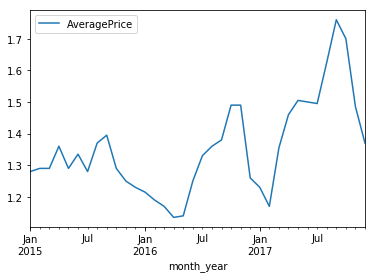

In [197]:
avo_month_df.plot('month_year','AveragePrice')

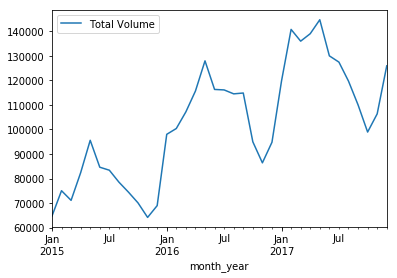

In [198]:
avo_month_df.plot('month_year','Total Volume')